# Import library

In [13]:
!pip install PennyLane
!pip install qiskit

import pennylane as qml
from pennylane import numpy as np
from pennylane.optimize import AdamOptimizer, GradientDescentOptimizer
import matplotlib.pyplot as plt
import math
from sklearn.metrics import accuracy_score

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import argparse

from torch.optim.lr_scheduler import CosineAnnealingLR
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import DataLoader

import math
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib.backends.backend_pdf import PdfPages
from PIL import Image
from mpl_toolkits.mplot3d import Axes3D

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Encoding comparison (Nonlinear)

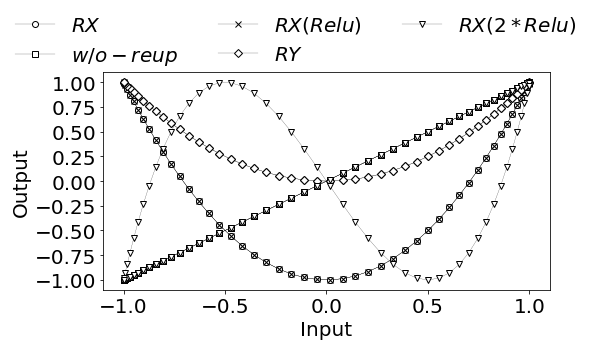

In [14]:
n_qubits = 1
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev)
def qnode(inputs):
    qml.RX(inputs, wires=0)
    qml.Identity(wires=0)
    qml.RX(inputs, wires=0)
    return (qml.expval(qml.PauliZ(0)))


@qml.qnode(dev)
def qnode1(inputs):
    qml.RX(inputs, wires=0)
    return (qml.expval(qml.PauliZ(0)))

@qml.qnode(dev)
def qnode2(inputs):
    qml.RX(inputs, wires=0)
    qml.Identity(wires=0)
    return (qml.expval(qml.PauliZ(0)))


@qml.qnode(dev)
def qnode3(inputs, inputs_relu):
    qml.RX(inputs, wires=0)
    qml.Identity(wires=0)
    qml.RX(inputs_relu, wires=0)
    return (qml.expval(qml.PauliZ(0)))


@qml.qnode(dev)
def qnode4(inputs):
    qml.RX(inputs, wires=0)
    qml.Identity(wires=0)
    qml.RY(inputs, wires=0)
    return (qml.expval(qml.PauliZ(0)))


init_input = np.linspace(-math.pi,math.pi,100)
relu_input = np.maximum(0,init_input)
relu_input2 = np.maximum(0,init_input)*2

encode_input = np.zeros(100)
nore_out = np.zeros(100)
reupload_out = np.zeros(100)
rerelu_out = np.zeros(100)
ry_out = np.zeros(100)
rerelu_out2 = np.zeros(100)
for i in range(len(init_input)):
  x1 = qnode1(init_input[i])
  encode_input[i] = x1
  x2 = qnode(init_input[i])
  reupload_out[i] = x2
  x3 = qnode2(init_input[i])
  nore_out[i] = x3
  x4 = qnode3(init_input[i], relu_input[i])
  rerelu_out[i] = x4
  x5 = qnode4(init_input[i])
  ry_out[i] = x5
  x6 = qnode3(init_input[i], relu_input2[i])
  rerelu_out2[i] = x6

a = encode_input.reshape(100, 1)
b = nore_out.reshape(100, 1)
c = reupload_out.reshape(100, 1)
d = rerelu_out.reshape(100, 1)
e = ry_out.reshape(100, 1)
f = rerelu_out2.reshape(100, 1)

final = np.concatenate((a,b),axis=1)
final = np.concatenate((final,c),axis=1)
final = np.concatenate((final,d),axis=1)
final = np.concatenate((final,e),axis=1)
final = np.concatenate((final,f),axis=1)


plt.figure(figsize=(8,4)) 
plt.plot(encode_input, reupload_out, label="$RX$",color="black",linewidth=0.2, marker='o', markerfacecolor="w")
plt.plot(encode_input, nore_out, label="$w/o-reup$",color="black",linewidth=0.2, marker='s', markerfacecolor="w")
plt.plot(encode_input, rerelu_out, label="$RX(Relu)$",color="black",linewidth=0.2, marker='x', markerfacecolor="w")
plt.plot(encode_input, ry_out, label="$RY$",color="black",linewidth=0.2, marker='D', markerfacecolor="w")
plt.plot(encode_input, rerelu_out2, label="$RX(2*Relu)$",color="black",linewidth=0.2, marker='v', markerfacecolor="w")
plt.xlabel('Input', size = 20)
plt.ylabel('Output', size = 20)

my_x_ticks = np.arange(-1, 1.001, 0.5)
plt.yticks(fontproperties = 'Times New Roman', size = 20)
plt.xticks( my_x_ticks, fontproperties = 'Times New Roman', size = 20)
plt.legend(bbox_to_anchor=(1.1, 1.35), ncol=3, prop={'size': 20}, frameon=False)
 
plt.show()


# 2-qubit gate comparison

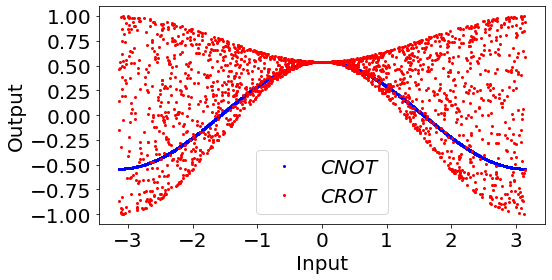

In [17]:
n_qubits = 2
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev)
def qnode(inputs):
    qml.RX(inputs, wires=0)
    qml.RX(1, wires=1)
    qml.CNOT(wires=[0, 1])
    return (qml.expval(qml.PauliZ(1)))


@qml.qnode(dev)
def qnode1(inputs, w):
    qml.RX(inputs, wires=0)
    qml.RX(1, wires=1)
    qml.CRX(w, wires=[0, 1])
    return (qml.expval(qml.PauliZ(1)))   


init_input = (np.random.random(2000) * 2 - 1) * math.pi
cnot_input = np.zeros(2000)
w = (np.random.random(2000) * 2 - 1) * math.pi
w1 = (np.random.random(2000) * 2 - 1) * math.pi
crx_input = np.zeros(2000)
for i in range(len(init_input)):
    x1 = qnode(init_input[i])
    cnot_input[i] = x1
    x1 = qnode1(init_input[i], w[i])
    crx_input[i] = x1


a = init_input.reshape(2000, 1)
b = cnot_input.reshape(2000, 1)

final = np.concatenate((a,b),axis=1)
final = np.concatenate((final,c),axis=1)


plt.figure(figsize=(8,4))
plt.plot(init_input, cnot_input, 'o',color='b', markersize=2, label="$CNOT$")
plt.plot(init_input, crx_input, 'o',color='r', markersize=2, label="$CROT$")

plt.xlabel('Input', size = 20)
plt.ylabel('Output', size = 20)
plt.yticks(fontproperties = 'Times New Roman', size = 20)
plt.xticks(fontproperties = 'Times New Roman', size = 20)
plt.legend(prop={'size': 20})
plt.savefig('ruu_cnot_crot_cmp.pdf', bbox_inches='tight')
plt.show()

